In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import sys

In [2]:
data = pd.read_csv("E:/BeTech 3rd year/sem2/ML/titanic_train.csv")

In [3]:
print(data.shape)
print(data.head())
print(data.columns)

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [4]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [6]:
data = data.drop(columns='Cabin', axis=1)

In [7]:
# replacing the missing values in "Age" column with mean value
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [8]:
# finding the mode value of "Embarked" column
print(data['Embarked'].mode())

0    S
dtype: object


In [9]:
print(data['Embarked'].mode()[0])

S


In [10]:
# replacing the missing values in "Embarked" column with mode value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [11]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

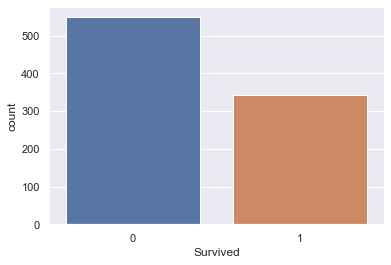

In [13]:
# making a count plot for "Survived" column
sns.countplot(x= 'Survived', data=data)

In [14]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

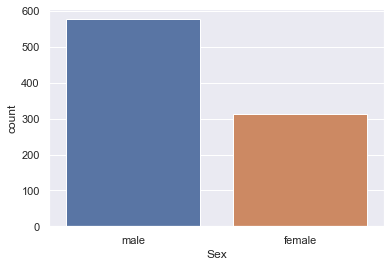

In [15]:
sns.countplot(x = 'Sex', data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

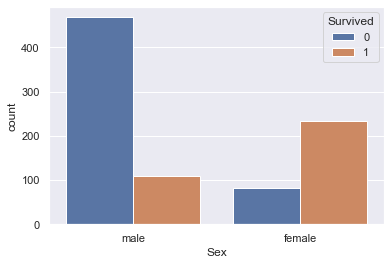

In [16]:
# number of survivors Gender wise
sns.countplot(x= 'Sex', hue='Survived', data=data)

In [19]:
# converting categorical Columns

data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [27]:
X = data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = data['Survived']

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [29]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [30]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [34]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
predTree = drugTree.predict(X_testset)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3)

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
Y_train_pred = clf.predict(x_train)
print("Accuracy:",metrics.accuracy_score(y_train, Y_train_pred))#training accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))#testing accuracy

clf1 = DecisionTreeClassifier()
print(cross_val_score(clf1, x_train, y_train, cv=10, scoring='accuracy').mean())

Accuracy: 0.9823434991974318
Accuracy: 0.7649253731343284
0.7897337429595493


[Text(165.5482300884956, 211.04470588235293, 'X[1] <= 0.5\ngini = 0.482\nsamples = 623\nvalue = [370, 253]'),
 Text(64.44159292035398, 198.25411764705882, 'X[0] <= 1.5\ngini = 0.311\nsamples = 389\nvalue = [314, 75]'),
 Text(28.146902654867258, 185.4635294117647, 'X[2] <= 53.0\ngini = 0.482\nsamples = 84\nvalue = [50, 34]'),
 Text(17.776991150442477, 172.6729411764706, 'X[5] <= 26.144\ngini = 0.498\nsamples = 68\nvalue = [36, 32]'),
 Text(14.814159292035399, 159.88235294117646, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(20.73982300884956, 159.88235294117646, 'X[5] <= 30.598\ngini = 0.499\nsamples = 62\nvalue = [30, 32]'),
 Text(14.814159292035399, 147.09176470588235, 'X[2] <= 32.35\ngini = 0.291\nsamples = 17\nvalue = [3, 14]'),
 Text(11.851327433628319, 134.30117647058825, 'X[5] <= 28.71\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(8.888495575221238, 121.51058823529411, 'X[6] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(5.925663716814159, 108.72, 'X[2] <= 28

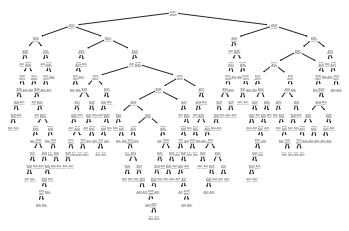

In [37]:
from sklearn import tree
tree.plot_tree(clf)